In [1]:
import data.load_data as ld
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
_, cancer_data = ld.load_data()

In [2]:
display(cancer_data)

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,0,7,2,8,0,5,3,...,4,6,3,1,0,0,0.398696,28.0,5,Medium
1,LU0001,Prostate,74,1,8,9,8,0,0,3,...,1,3,3,0,0,5,0.424299,25.4,9,Medium
2,LU0002,Skin,55,1,7,10,7,0,3,3,...,1,8,10,0,0,6,0.605082,28.6,2,Medium
3,LU0003,Colon,61,0,6,2,2,0,6,2,...,6,4,8,0,0,8,0.318449,32.1,7,Low
4,LU0004,Lung,67,1,10,7,4,0,6,3,...,9,10,9,0,0,5,0.524358,25.1,2,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ST0395,Colon,60,1,4,6,4,0,10,6,...,4,5,3,1,0,4,0.437539,30.3,3,Medium
1996,ST0396,Prostate,84,1,5,7,8,0,10,0,...,2,1,3,0,0,2,0.451128,25.9,4,Medium
1997,ST0397,Lung,65,0,7,2,10,0,4,2,...,3,6,0,0,1,0,0.295760,22.5,3,Low
1998,ST0398,Lung,64,1,10,2,10,0,2,10,...,5,4,2,0,0,10,0.422201,25.3,3,Medium


In [3]:
duplicate_rows = cancer_data[cancer_data['Patient_ID'].duplicated(keep=False)]
display(duplicate_rows)

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level


In [4]:
cancer_data['Cancer_Type_Encoded'] = cancer_data['Cancer_Type'].astype('category').cat.codes
display(cancer_data[['Cancer_Type', 'Cancer_Type_Encoded']])

,Cancer_Type,Cancer_Type_Encoded
0,Breast,0
1,Prostate,3
2,Skin,4
3,Colon,1
4,Lung,2
...,...,...
1995,Colon,1
1996,Prostate,3
1997,Lung,2
1998,Lung,2


In [5]:
n_types = len(cancer_data['Cancer_Type'].unique())

kmeans = KMeans(n_clusters=n_types, random_state=42, n_init='auto')
pca = PCA(n_components=2, random_state=42)

data_for_dr = cancer_data.drop(columns=['Patient_ID', 'Cancer_Type_Encoded', 'Cancer_Type', 'Overall_Risk_Score', 'Risk_Level'])

data_reduced = pca.fit_transform(data_for_dr)
kmeans = kmeans.fit(data_reduced)

mapping = kmeans.labels_

c:\Users\morte\miniconda3\envs\ML-DTU\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [6]:
mapping

array([2, 4, 0, ..., 1, 2, 1], dtype=int32)

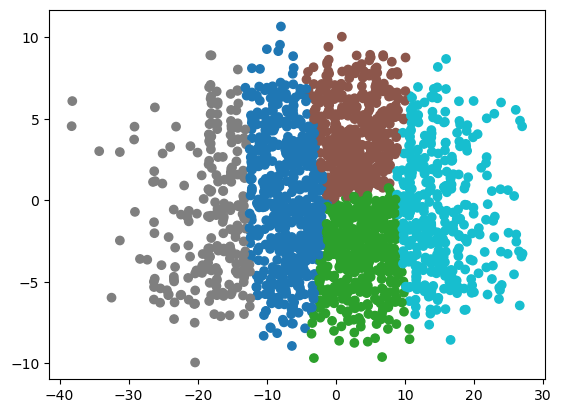

In [7]:
ld.display_data(data_reduced, mapping)